In [2]:
% matplotlib inline
from astropy.stats import LombScargle
import P_Cyg as pc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from astropy.io import fits

In [11]:
datadir = 'C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/'
fits_files = glob(datadir + 'hpolccd*r_hw.fits')
txt = glob(datadir + 'hpolccd*r_hw.fits.txt')
rfile = datadir+"/synthetic_filters/r_pcyg.txt"
r = pd.read_csv(rfile)

In [4]:
class FObs(object):
    def __init__(self,w,q,u):
        self.w = w
        self.q = q
        self.u = u
        self.pol,self.pa = pc.polarization(self.q,self.u)
        self.amplitude = self.pol.max()-self.pol.min()
    
    def check_amp(self):
        fig,ax = plt.subplots(figsize=(15,10))
        ax.plot(self.w,self.pol)
        ax.axhline(self.pol.max())
        ax.axhline(self.pol.min())
        #ax.text(6560,1,str(self.amplitude))
        
        

In [5]:
ws,qs,us = [],[],[]
for f in txt:
    w,f,q,u,e = pc.txt_QU_data(f, 1000, radial_velocity=-8.9)
    ws.append(w)
    qs.append(q)
    us.append(u)

In [6]:
hw = [w[np.where((w >= 6540) & (w <= 6600))]    for w in ws]
hq = [q[np.where((w >= 6540) & (w <= 6600))]    for q,w in zip(qs,ws)]
hu = [u[np.where((w >= 6540) & (w <= 6600))]    for u,w in zip(us,ws)]
t = [pc.get_time(f)    for f in fits_files]

In [7]:
amps = [FObs(w,q,u).amplitude    for w,q,u in zip(hw,hq,hu)]

0.14148580655775292 30.3571677936372


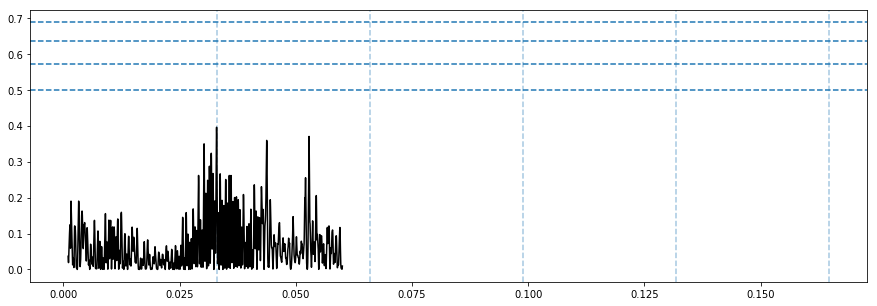

In [8]:
ls = LombScargle(np.array(t),np.array(amps))
f = np.linspace(0.001,0.06,100000)
p = ls.power(f)
fals = [ls.false_alarm_level(i)    for i in [0.01,0.001,0.0001,0.00001]]
bp = pc.find_best_period(f,p)
best_period = 1/bp
fa = ls.false_alarm_probability(max(p))
fig,ax = plt.subplots(1,figsize=[15,5])
ax.axvline(bp,linestyle='--',alpha=0.4)
ax.axvline(2*bp,linestyle='--',alpha=0.4)
ax.axvline(3*bp,linestyle='--',alpha=0.4)
ax.axvline(4*bp,linestyle='--',alpha=0.4)
ax.axvline(5*bp,linestyle='--',alpha=0.4)
ax.plot(f,p,color='black')
for f in fals:
    ax.axhline(f,linestyle='--')
print(fa,best_period)
plt.show()

In [9]:
intrinsic_dir = "C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/intrinsic_pols/"
files = glob(intrinsic_dir+"*")
retfiles = [f    for f in files if f[72]=='o']
rfiles = [f    for f in files if f[72]=='r']
bfiles = [f    for f in files if f[72]=='b']
matched = []
for rf in rfiles:
    for bf in bfiles:
        if rf[64:69]==bf[64:69]:
            matched.append([rf,bf])
matched = np.array(matched)
mdfs = [[pd.read_csv(f[0]),pd.read_csv(f[1])]    for f in matched]
mdfs = [pd.concat([p[0],p[1][p[1].Wavelength < 6100]]).sort_values("Wavelength")    for p in mdfs]
rdfs = [pd.read_csv(f)    for f in files if f[72]=='r']
bdfs = [pd.read_csv(f)    for f in files if f[72]=='b']
retdfs = [pd.read_csv(f)     for f in retfiles]
alldfs = retdfs+mdfs
t = [float(f[64:69])    for f in retfiles] + [float(f[0][64:69])    for f in matched]
mt = np.array([float(f[0][64:69])    for f in matched])
mphaset = (mt/97)%1

ValueError: x and y must have same first dimension, but have shapes (30,) and (34,)

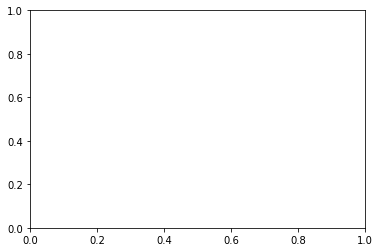

In [10]:
plt.plot(mt,amps)